Important formulas:

$$\cos(\theta_e)=\bigg(1+\frac{m_e}{E_\nu}\bigg)\sqrt{\frac{T}{T+2m_e}}$$
$\theta_e$ angle between solar $\nu$ and electron emitted, T energy deposited by the event.
$$\cos(\theta_{Cher}) = \frac{1}{n \beta}$$
$$\beta = \sqrt{1 - \big(\frac{m_e}{m_e+T}\big)^2}$$

Goniometric formulas:
I have used the spherical coordinates that follow:
$$\begin{cases}
    x = \rho \cos(\theta) \sin(\phi) \\
    y = \rho \sin(\theta) \sin(\phi) \\
    z = \rho \cos(\phi)
    \end{cases}
    $$
with $\phi \in [0,\pi]$ and $\theta \in [0,2\pi)$ ($\phi$ is the colatitude). Distance between two points on a sphere:
$$\cos(\gamma) = \sin(\phi_A)\sin(\phi_B)\cos(\theta_A-\theta_B) + \cos(\phi_A) \cos(\phi_B)$$
Where $\gamma$ is the angular distance and A,B the points on the sphere.


Rotations 

A rotation with yaw $\theta_0$ and pitch $\phi_0$ gives a rotation matrix of:
$$\begin{bmatrix}
    \cos(\theta_0)\cos(\phi_0) & -\sin(\theta_0) & \cos(\theta_0)\sin(\phi_0) \\
    \sin(\theta_0)\cos(\phi_0) & \cos(\theta_0) & \sin(\theta_0)\sin(\phi_0) \\
    -\sin(\phi_0) & 0 & \cos(\phi_0)
    \end{bmatrix}$$

Number of scintillation photons 20200


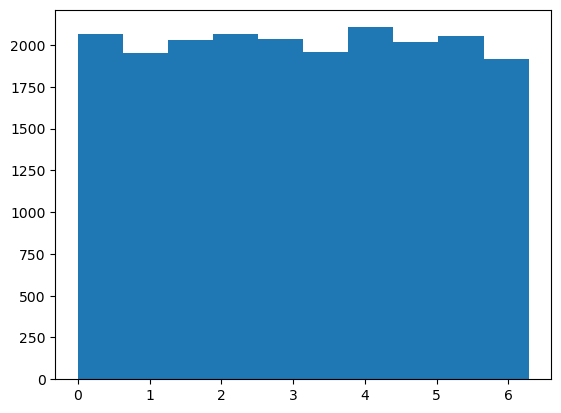

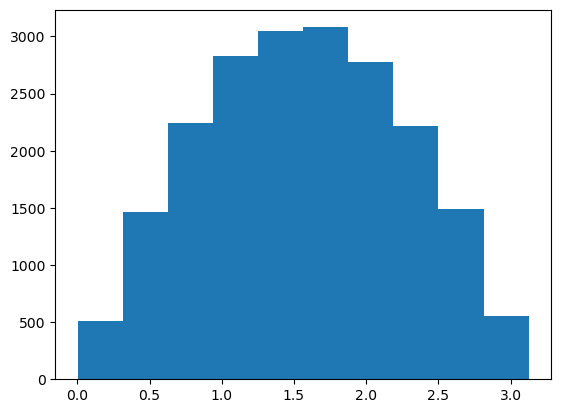

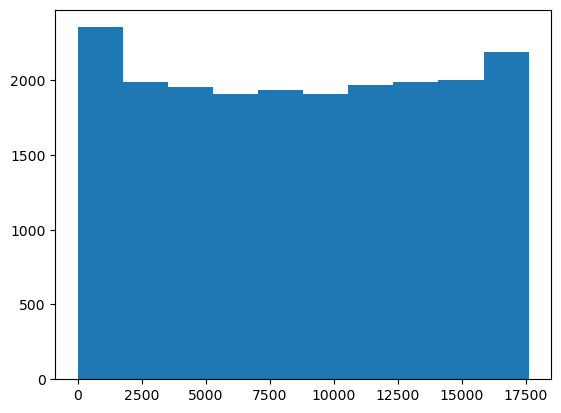

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table
import numpy as np
import sys
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d

Names = np.array(["theta","phi","closest_PMT","type"])
datas = Table.read("Output.txt",format="ascii",names=Names)

thetas = np.array(datas["theta"])
phis = np.array(datas["phi"])
closest_PMTs = np.array(datas["closest_PMT"])
types = np.array(datas["type"])
N = len(thetas)

print("Number of scintillation photons", N)

plt.hist(thetas);
plt.show()
plt.hist(phis);
plt.show()
plt.hist(closest_PMTs);
plt.show()

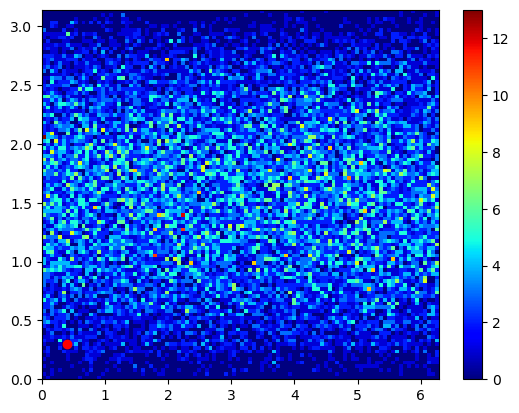

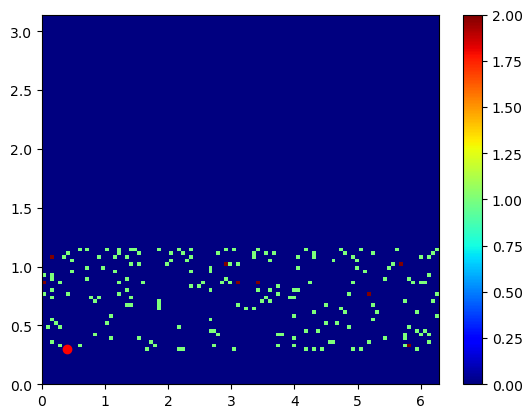

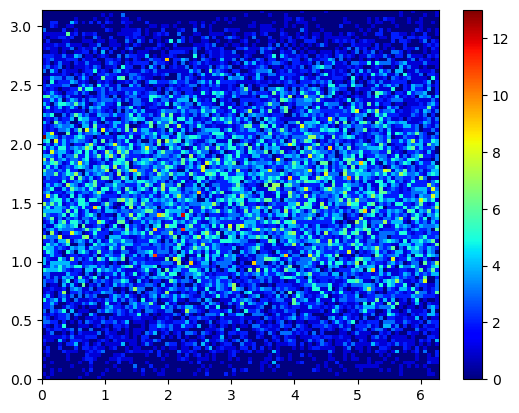

In [7]:
def SphericalToCarthesian (r,theta,phi) :
    if (len(theta) != len(phi) ) :
        sys.exit("ERROR: theta and phi do not have the same lenght")
    N=len(theta)
    x=np.zeros(N)
    y=np.zeros(N)
    z=np.zeros(N)
    for i in range(0,N) :
        x[i]=r*np.cos(theta[i])*np.sin(phi[i])
        y[i]=r*np.sin(theta[i])*np.sin(phi[i])
        z[i]=r*np.cos(phi[i])
    return x,y,z


Cher_thetas=[]
Cher_phis=[]
Scint_thetas=[]
Scint_phis=[]
for i in range(0,N) :
    if types[i] == 1 :
        Cher_thetas.append(thetas[i])
        Cher_phis.append(phis[i])
    else :
        Scint_thetas.append(thetas[i])
        Scint_phis.append(phis[i])
        
        
plt.hist2d(thetas, phis, bins=(100, 100), range=[[0,2*np.pi],[0,np.pi]],cmap=plt.cm.jet)
plt.plot(0.4, 0.3, marker="o", color="red")
plt.colorbar()
plt.show()

plt.hist2d(Cher_thetas,Cher_phis, bins=(100, 100), range=[[0,2*np.pi],[0,np.pi]],cmap=plt.cm.jet)
plt.plot(0.4, 0.3, marker="o", color="red")
plt.colorbar()
plt.show()

plt.hist2d(Scint_thetas,Scint_phis, bins=(100,100), range=[[0,2*np.pi],[0,np.pi]],cmap=plt.cm.jet)
plt.colorbar()
plt.show()



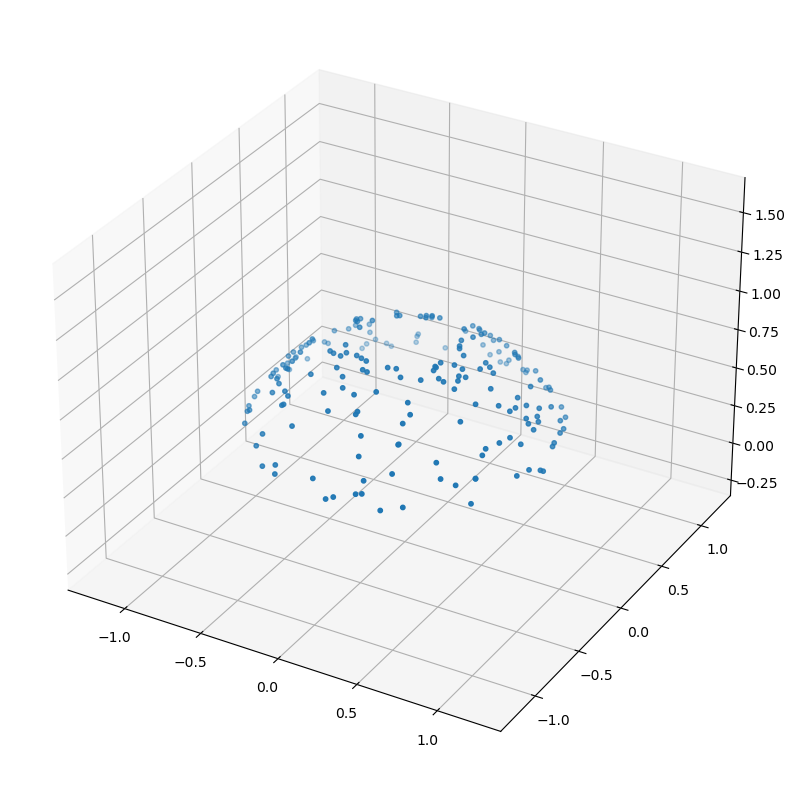

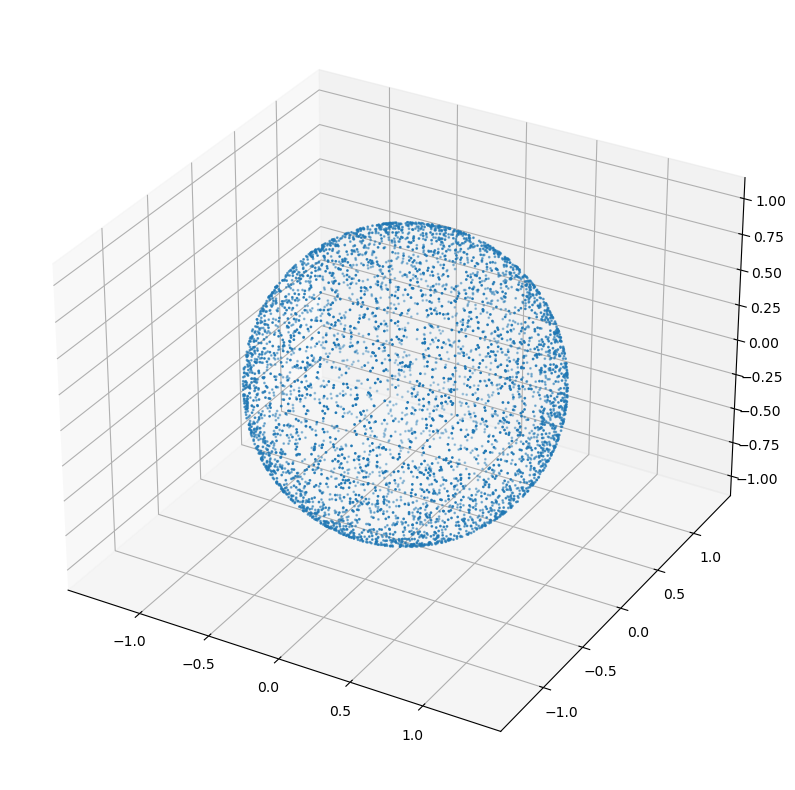

In [9]:
x_scint,y_scint,z_scint = SphericalToCarthesian(1.,Scint_thetas,Scint_phis)
x_cher,y_cher,z_cher = SphericalToCarthesian(1.,Cher_thetas,Cher_phis)
sizes = np.full(len(x_cher),10)
sizes_scint = np.full(len(x_scint),1)

def Make3dPlot(X,Y,Z,sizes) :


    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(projection='3d')

    scat = ax.scatter(X, Y, Z,s=sizes)

    # Create cubic bounding box to simulate equal aspect ratio. Default aspect ratio is 4:4:3, fix the constants to fix the ratio
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.6666*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.6666*(X.max()+X.min())
    Yb = 0.6666*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.6666*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')

    plt.grid()
    plt.show()

Make3dPlot(x_cher,y_cher,z_cher,sizes)

scattlim=5000 #limit the scintillation events plotted 
Make3dPlot(x_scint[:scattlim],y_scint[:scattlim],z_scint[:scattlim],sizes_scint[:scattlim])